In [1]:
import numpy as np 
import pandas as pd 

import os
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import pyLDAvis.sklearn
import json
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
import importlib

import warnings
warnings.filterwarnings('ignore')

from gensim.parsing.preprocessing import remove_stopwords
from textblob import Word
import string


/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/nouf/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version clas

In [2]:
df = pd.read_csv("/Users/nouf/Desktop/البروجيكت الرابع/COVID19_df_EN_15.csv")

In [3]:
#Importing Spacy STOP_WORDS and English
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

In [4]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['’m',
 'throughout',
 'mostly',
 'though',
 'move',
 'will',
 'nine',
 'part',
 'could',
 'wherein']

In [5]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 'table',
    'rights', 'reserved', 'permission', 'use', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI']

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [6]:
import scispacy
import spacy
import en_core_sci_lg
from scispacy.abbreviation import AbbreviationDetector
from scispacy.umls_linking import UmlsEntityLinker

# Preprocessing

In [7]:
df['body_text'] = df['body_text'].str.lower()

In [8]:
df['body_text'] 

0        during these ten years, 18,483 suspected and c...
1        of telehealth. 2 private practice psychiatry i...
2        a joint working group established by the haema...
3        despite considerable progress in our understan...
4        pneumonia remains the leading cause of death i...
                               ...                        
14995    i nfection with middle east respiratory syndro...
14996    patient-level data sharing is fundamental to t...
14997    the advent of covid-19 vaccines will play a ma...
14998    preprint is a form of a scholarly article whic...
14999    pcr. chest x-ray was unremarkable. blood cultu...
Name: body_text, Length: 15000, dtype: object

In [9]:
df['body_text'] = df['body_text'].apply(lambda x : re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",x))

In [10]:
df['body_text']

0        during these ten years, 18,483 suspected and c...
1        of telehealth. 2 private practice psychiatry i...
2        a joint working group established by the haema...
3        despite considerable progress in our understan...
4        pneumonia remains the leading cause of death i...
                               ...                        
14995    i nfection with middle east respiratory syndro...
14996    patient-level data sharing is fundamental to t...
14997    the advent of covid-19 vaccines will play a ma...
14998    preprint is a form of a scholarly article whic...
14999    pcr. chest x-ray was unremarkable. blood cultu...
Name: body_text, Length: 15000, dtype: object

In [11]:
import unidecode

In [12]:
df['body_text'] = df['body_text'].apply(lambda x : unidecode.unidecode(x))

In [13]:
df['body_text'] 

0        during these ten years, 18,483 suspected and c...
1        of telehealth. 2 private practice psychiatry i...
2        a joint working group established by the haema...
3        despite considerable progress in our understan...
4        pneumonia remains the leading cause of death i...
                               ...                        
14995    i nfection with middle east respiratory syndro...
14996    patient-level data sharing is fundamental to t...
14997    the advent of covid-19 vaccines will play a ma...
14998    preprint is a form of a scholarly article whic...
14999    pcr. chest x-ray was unremarkable. blood cultu...
Name: body_text, Length: 15000, dtype: object

In [14]:
df['body_text']= df['body_text'].apply(lambda x : re.sub(r'\.+', ". ", x))

In [15]:
df['body_text']

0        during these ten years, 18,483 suspected and c...
1        of telehealth.  2 private practice psychiatry ...
2        a joint working group established by the haema...
3        despite considerable progress in our understan...
4        pneumonia remains the leading cause of death i...
                               ...                        
14995    i nfection with middle east respiratory syndro...
14996    patient-level data sharing is fundamental to t...
14997    the advent of covid-19 vaccines will play a ma...
14998    preprint is a form of a scholarly article whic...
14999    pcr.  chest x-ray was unremarkable.  blood cul...
Name: body_text, Length: 15000, dtype: object

In [16]:
df['body_text'] = df['body_text'].str.replace("[^a-zA-Z#]", " ")

In [17]:
df['body_text']

0        during these ten years         suspected and c...
1        of telehealth     private practice psychiatry ...
2        a joint working group established by the haema...
3        despite considerable progress in our understan...
4        pneumonia remains the leading cause of death i...
                               ...                        
14995    i nfection with middle east respiratory syndro...
14996    patient level data sharing is fundamental to t...
14997    the advent of covid    vaccines will play a ma...
14998    preprint is a form of a scholarly article whic...
14999    pcr   chest x ray was unremarkable   blood cul...
Name: body_text, Length: 15000, dtype: object

In [18]:
df['body_text'] = df['body_text'].apply(lambda x: remove_stopwords(x))

In [19]:
df['body_text']

0        years suspected confirmed cases deaths reporte...
1        telehealth private practice psychiatry austral...
2        joint working group established haemato oncolo...
3        despite considerable progress understanding co...
4        pneumonia remains leading cause death children...
                               ...                        
14995    nfection middle east respiratory syndrome mers...
14996    patient level data sharing fundamental advance...
14997    advent covid vaccines play major role helping ...
14998    preprint form scholarly article peer reviewed ...
14999    pcr chest x ray unremarkable blood cultures dr...
Name: body_text, Length: 15000, dtype: object

In [20]:
df['body_text'] = df['body_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [21]:
df['body_text'] 

0        years suspected confirmed cases deaths reporte...
1        telehealth private practice psychiatry austral...
2        joint working group established haemato oncolo...
3        despite considerable progress understanding co...
4        pneumonia remains leading cause death children...
                               ...                        
14995    nfection middle east respiratory syndrome mers...
14996    patient level data sharing fundamental advance...
14997    advent covid vaccines play major role helping ...
14998    preprint form scholarly article peer reviewed ...
14999    pcr chest ray unremarkable blood cultures draw...
Name: body_text, Length: 15000, dtype: object

In [22]:
from textblob import Word

In [23]:
df['body_text'] = df['body_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [24]:
df['body_text']

0        year suspected confirmed case death reported c...
1        telehealth private practice psychiatry austral...
2        joint working group established haemato oncolo...
3        despite considerable progress understanding co...
4        pneumonia remains leading cause death child wo...
                               ...                        
14995    nfection middle east respiratory syndrome mers...
14996    patient level data sharing fundamental advance...
14997    advent covid vaccine play major role helping e...
14998    preprint form scholarly article peer reviewed ...
14999    pcr chest ray unremarkable blood culture drawn...
Name: body_text, Length: 15000, dtype: object

In [25]:
from nltk.corpus import stopwords

In [26]:
stop = stopwords.words('english')
df['body_text'] = df['body_text'].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [27]:
df['body_text']

0        year suspected confirmed case death reported c...
1        telehealth private practice psychiatry austral...
2        joint working group established haemato oncolo...
3        despite considerable progress understanding co...
4        pneumonia remains leading cause death child wo...
                               ...                        
14995    nfection middle east respiratory syndrome mers...
14996    patient level data sharing fundamental advance...
14997    advent covid vaccine play major role helping e...
14998    preprint form scholarly article peer reviewed ...
14999    pcr chest ray unremarkable blood culture drawn...
Name: body_text, Length: 15000, dtype: object

In [28]:
from nltk.tokenize import word_tokenize
def identify_tokens(row):
    tokens = word_tokenize(row)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

In [29]:
df['body_text_T'] = df['body_text'].apply(identify_tokens) 

In [30]:
df['body_text_T']

0        [year, suspected, confirmed, case, death, repo...
1        [telehealth, private, practice, psychiatry, au...
2        [joint, working, group, established, haemato, ...
3        [despite, considerable, progress, understandin...
4        [pneumonia, remains, leading, cause, death, ch...
                               ...                        
14995    [nfection, middle, east, respiratory, syndrome...
14996    [patient, level, data, sharing, fundamental, a...
14997    [advent, covid, vaccine, play, major, role, he...
14998    [preprint, form, scholarly, article, peer, rev...
14999    [pcr, chest, ray, unremarkable, blood, culture...
Name: body_text_T, Length: 15000, dtype: object

In [31]:
word_list=[]
    #loop over all thetext
for tw_words in df['body_text_T']:
        word_list.extend(tw_words)
word_freq=pd.Series(word_list).value_counts()
    #print top 25 Words
ww=word_freq[:100]

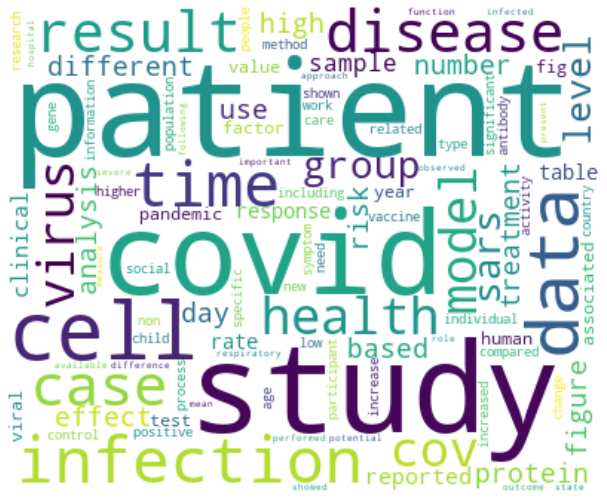

In [32]:
#generate word cloud
wc=WordCloud(width=400,height=330,background_color="white").generate_from_frequencies(ww)
plt.figure(figsize=(13,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [33]:
    vectorizer = TfidfVectorizer(min_df = 30 , max_df = 10000000 )
    X = vectorizer.fit_transform(df['body_text']).toarray()
    df_tfidf=pd.DataFrame(X, columns=vectorizer.get_feature_names())

In [58]:
sil_scores2 = [] 
for i in range(2,30):
    km = KMeans(n_clusters= i, random_state=123)
    km.fit(X)
    sil_scores2.append(silhouette_score(X, km.labels_))

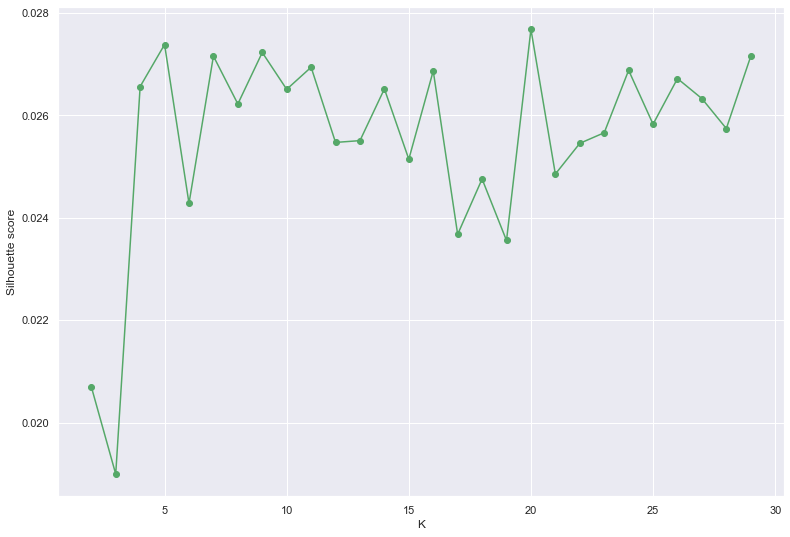

In [59]:
plt.plot(range(2,30), sil_scores2, 'og-')
plt.xlabel("K")
plt.ylabel("Silhouette score");

In [36]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

In [39]:
vectorizer = TfidfVectorizer(min_df = 10 , max_df = 100000)
X = vectorizer.fit_transform(df['body_text'].values)   

In [40]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(15000, 2445)

In [61]:
# plot

In [62]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

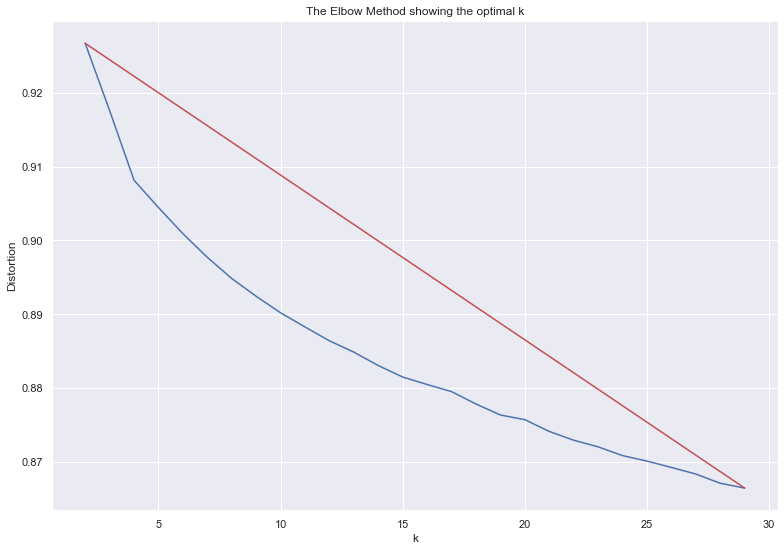

In [63]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

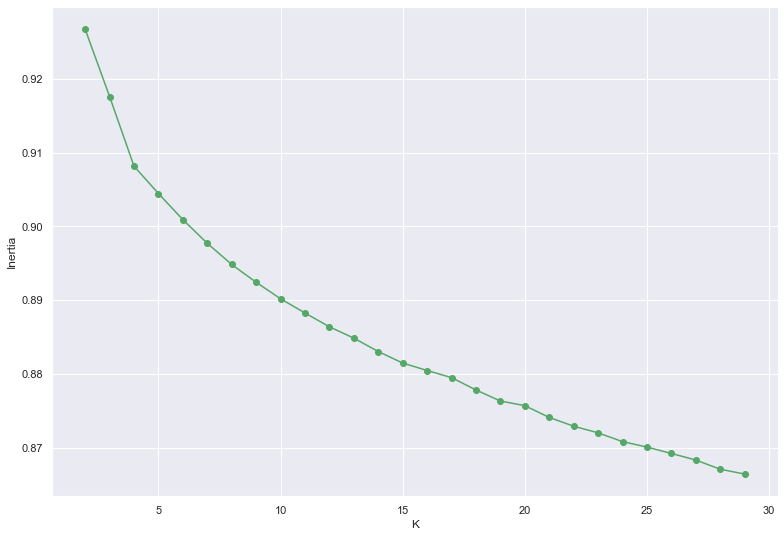

In [68]:
plt.plot(range(2,30), distortions, 'og-')
plt.xlabel("K")
plt.ylabel("Inertia");


In [43]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=50)  
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 15000 samples in 7.901s...
[t-SNE] Computed neighbors for 15000 samples in 1311.978s...
[t-SNE] Computed conditional probabilities for sample 1000 / 15000
[t-SNE] Computed conditional probabilities for sample 2000 / 15000
[t-SNE] Computed conditional probabilities for sample 3000 / 15000
[t-SNE] Computed conditional probabilities for sample 4000 / 15000
[t-SNE] Computed conditional probabilities for sample 5000 / 15000
[t-SNE] Computed conditional probabilities for sample 6000 / 15000
[t-SNE] Computed conditional probabilities for sample 7000 / 15000
[t-SNE] Computed conditional probabilities for sample 8000 / 15000
[t-SNE] Computed conditional probabilities for sample 9000 / 15000
[t-SNE] Computed conditional probabilities for sample 10000 / 15000
[t-SNE] Computed conditional probabilities for sample 11000 / 15000
[t-SNE] Computed conditional probabilities for sample 12000 / 15000
[t-SNE] Computed conditional probabilities for

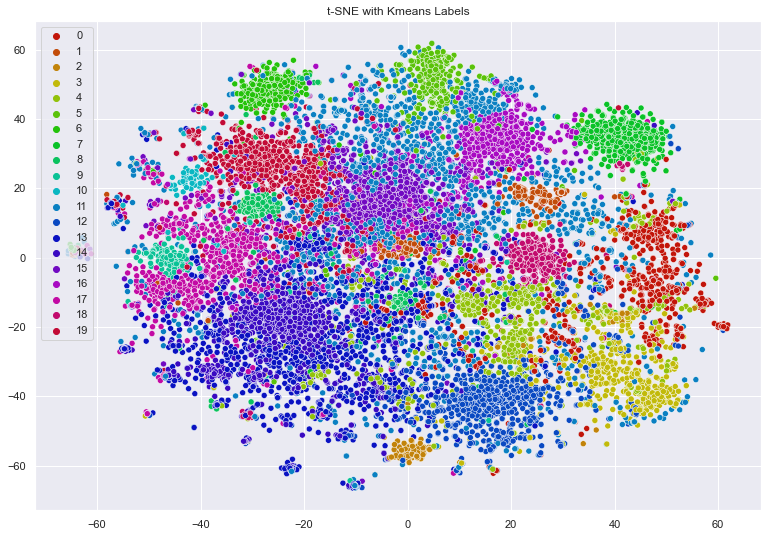

In [44]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()
